In [1]:
import dgl # huggingface 같은 라이브러리
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from stgraph_trainer.datasets import *
from stgraph_trainer.trainers import RNNTrainer
from stgraph_trainer.utils import save_figure_predict
from stgraph_trainer.utils import matplotlib_plot_font
from stgraph_trainer.models import STGCN_WAVE
from stgraph_trainer.utils import compute_metrics

import scipy.sparse as sp
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os
from stgraph_trainer.models import GRU, LSTM
print(os.getcwd())

matplotlib_plot_font()
device = torch.device("cpu")

/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using TensorFlow backend.


/Users/jeonjunhwi/문서/Projects/Master_GNN/Code


In [2]:
def seq_data(data,sequence_length):
    x_seq = []
    y_seq = []
    for i in range(len(data) - sequence_length):
        x_seq.append(data[i:i+sequence_length])
        y_seq.append(data[i+sequence_length])
        # print(y_seq)
    return torch.FloatTensor(x_seq).to(device), torch.FloatTensor(y_seq).to(device).view(-1, 1)

def evaluate_metric(model, data_iter):
    model.eval()
    with torch.no_grad():
        mae, mape, mse = [], [], []
        for x, y in data_iter:
            #y = y.cpu().numpy().reshape(-1)
            y_pred = model(x).view(len(x), -1).cpu().numpy()#.reshape(-1)
            d = np.abs(y - y_pred)
            mae += d.tolist()
            mape += (d / y).tolist()
            mse += (d ** 2).tolist()
        MAE = np.array(mae).mean()
        MAPE = np.array(mape).mean()
        RMSE = np.sqrt(np.array(mse).mean())
        return MAE, MAPE, RMSE
    
def seed_everything(seed = 42):
    import random
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    print(f'Seed set = {seed}')
    
seed_everything()

Seed set = 42


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0562 val_loss : 1.9059


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0007 val_loss : 1.9161
0
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0080 val_loss : 1.0785


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0320 val_loss : 1.1123


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0315 val_loss : 0.6072
[epoch : 0] train_loss : 1.0116 val_loss : 0.6134


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0168 val_loss : 0.6567
[epoch : 0] train_loss : 1.0513 val_loss : 0.6699


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0227 val_loss : 2.3987


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0359 val_loss : 2.5176


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0229 val_loss : 0.3529


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0070 val_loss : 0.3557


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0051 val_loss : 0.8879


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0008 val_loss : 0.9003


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0116 val_loss : 1.3984


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0045 val_loss : 1.4070


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0020 val_loss : 0.1909


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0082 val_loss : 0.1975


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.0001 val_loss : 0.0056


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 0.0002 val_loss : 0.0056


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0322 val_loss : 0.2917


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0508 val_loss : 0.2922


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0021 val_loss : 1.8880


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0137 val_loss : 1.9344


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0032 val_loss : 0.5988


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0101 val_loss : 0.5999


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0313 val_loss : 1.1333


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0057 val_loss : 1.1283


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0031 val_loss : 0.6056


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0209 val_loss : 0.6182


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0093 val_loss : 1.5371


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0267 val_loss : 1.5809


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0060 val_loss : 0.0700


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0042 val_loss : 0.0690


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0358 val_loss : 1.4678


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0094 val_loss : 1.4880


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0039 val_loss : 0.9188


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0192 val_loss : 0.9292


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0263 val_loss : 3.1481


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0452 val_loss : 3.2135


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9890 val_loss : 1.0914


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0204 val_loss : 1.1165
20
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0245 val_loss : 1.4217
[epoch : 0] train_loss : 1.0409 val_loss : 1.4469
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0105 val_loss : 3.0792


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0421 val_loss : 3.1079
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0166 val_loss : 3.0172


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0203 val_loss : 3.1139
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0441 val_loss : 2.7529


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0194 val_loss : 2.7877
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9977 val_loss : 1.5594


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0115 val_loss : 1.6098
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0152 val_loss : 1.2680


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0080 val_loss : 1.3104
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9987 val_loss : 5.0606


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0204 val_loss : 5.1868
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0140 val_loss : 1.3746


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0118 val_loss : 1.4042
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0050 val_loss : 2.0143


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0475 val_loss : 2.0708
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9917 val_loss : 2.1200


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0047 val_loss : 2.1970
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9960 val_loss : 1.3494


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0717 val_loss : 1.4119
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0049 val_loss : 1.3440


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0207 val_loss : 1.3853
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0067 val_loss : 2.3124


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0346 val_loss : 2.3755
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0114 val_loss : 3.3893


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0090 val_loss : 3.4207
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0251 val_loss : 1.5842


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0114 val_loss : 1.5881
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0084 val_loss : 0.4367


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0191 val_loss : 0.4490
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0120 val_loss : 0.9756


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0041 val_loss : 0.9812
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0013 val_loss : 1.4658


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0050 val_loss : 1.5160
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0272 val_loss : 2.3261


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0093 val_loss : 2.3239
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9938 val_loss : 1.9303


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0091 val_loss : 2.0089
40
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0185 val_loss : 1.0226


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0004 val_loss : 1.0458
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0209 val_loss : 0.3535


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0710 val_loss : 0.3595
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9908 val_loss : 1.2762


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0141 val_loss : 1.3163
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9999 val_loss : 1.2691


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0080 val_loss : 1.2933
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9981 val_loss : 0.6847


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0114 val_loss : 0.6964
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0060 val_loss : 0.5556


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0117 val_loss : 0.5609
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9938 val_loss : 3.9970


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0240 val_loss : 4.3763
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0072 val_loss : 3.9991


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0041 val_loss : 4.0370
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0176 val_loss : 1.8048


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0197 val_loss : 1.8525
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0027 val_loss : 2.7178


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0355 val_loss : 2.8094
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0414 val_loss : 1.8813


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0195 val_loss : 1.9212
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0028 val_loss : 0.2757


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0117 val_loss : 0.2782


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0169 val_loss : 1.2503
[epoch : 0] train_loss : 1.0146 val_loss : 1.2618


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0026 val_loss : 2.4254
[epoch : 0] train_loss : 0.9995 val_loss : 2.4571


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0189 val_loss : 1.4753
[epoch : 0] train_loss : 1.0081 val_loss : 1.4854


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0134 val_loss : 2.7136
[epoch : 0] train_loss : 1.0101 val_loss : 2.7844


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0346 val_loss : 1.7022


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0302 val_loss : 1.7085


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0264 val_loss : 1.4743


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0041 val_loss : 1.4826


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0068 val_loss : 1.0992


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0311 val_loss : 1.1047


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9953 val_loss : 3.2990


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0105 val_loss : 3.3533
60
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0664 val_loss : 0.4206


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0135 val_loss : 0.4209
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0065 val_loss : 0.1143


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0065 val_loss : 0.1139
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0140 val_loss : 2.1117


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0068 val_loss : 2.1699


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0194 val_loss : 1.0489
[epoch : 0] train_loss : 1.0034 val_loss : 1.0610


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.1794 val_loss : 0.0514


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0065 val_loss : 0.0505


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9942 val_loss : 0.7088


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0041 val_loss : 0.7192


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0934 val_loss : 0.8806


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0805 val_loss : 0.8742


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9944 val_loss : 3.7598


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0005 val_loss : 3.7890


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.1553 val_loss : 0.3078


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 0.9998 val_loss : 0.3095


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.0011 val_loss : 0.3756


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 0.0002 val_loss : 0.3781


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0090 val_loss : 0.4643


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0032 val_loss : 0.4638


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9984 val_loss : 2.3316


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0668 val_loss : 2.3549


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0214 val_loss : 6.9950


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0138 val_loss : 7.1063


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0055 val_loss : 2.2821


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 0.9997 val_loss : 2.3165


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0077 val_loss : 2.0106


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0448 val_loss : 2.0133


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9970 val_loss : 3.7510


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0096 val_loss : 3.7711


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0001 val_loss : 0.7778


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0143 val_loss : 0.7854


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0375 val_loss : 0.0478


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0493 val_loss : 0.0456


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9997 val_loss : 10.9765


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0014 val_loss : 11.0849


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0155 val_loss : 2.3134


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0221 val_loss : 2.3674
80
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0248 val_loss : 0.1920


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0018 val_loss : 0.1927


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0292 val_loss : 0.7406
[epoch : 0] train_loss : 1.0488 val_loss : 0.7476


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9976 val_loss : 0.3431
[epoch : 0] train_loss : 1.0097 val_loss : 0.3438


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9991 val_loss : 2.7530
[epoch : 0] train_loss : 1.0013 val_loss : 2.7814


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0298 val_loss : 0.9076
[epoch : 0] train_loss : 1.0069 val_loss : 0.9218


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0097 val_loss : 5.2736


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0297 val_loss : 5.3299


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9944 val_loss : 9.3829


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0091 val_loss : 9.4485


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0133 val_loss : 2.3149


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0346 val_loss : 2.3867


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0225 val_loss : 1.4340


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0049 val_loss : 1.4342


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0106 val_loss : 2.5701


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0081 val_loss : 2.5754


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0765 val_loss : 3.9026


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0167 val_loss : 3.9114


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9908 val_loss : 1.7846


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0340 val_loss : 1.8381


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0059 val_loss : 1.7348


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0040 val_loss : 1.7635


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0917 val_loss : 0.4148


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0115 val_loss : 0.4194


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0020 val_loss : 7.8198


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0057 val_loss : 7.8947


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9962 val_loss : 0.1764


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0020 val_loss : 0.1783


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0081 val_loss : 3.1572


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0144 val_loss : 3.1834


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9966 val_loss : 4.5096


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0014 val_loss : 4.5567


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0131 val_loss : 1.3089


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0019 val_loss : 1.3213


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0108 val_loss : 0.5283


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0188 val_loss : 0.5290


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


100


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0083 val_loss : 0.5341
[epoch : 0] train_loss : 1.0055 val_loss : 0.5336


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0366 val_loss : 13.1511
[epoch : 0] train_loss : 1.0044 val_loss : 13.1933


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0006 val_loss : 0.3214


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0129 val_loss : 0.3225


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0137 val_loss : 17.1862


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0066 val_loss : 17.2913


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9865 val_loss : 5.8806


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0085 val_loss : 5.9968


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0046 val_loss : 0.3782


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0003 val_loss : 0.3806


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0092 val_loss : 4.6347


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0031 val_loss : 4.6777


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9987 val_loss : 2.2073


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0368 val_loss : 2.2500


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0131 val_loss : 7.0606


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0032 val_loss : 7.0930


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0491 val_loss : 4.3080


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0158 val_loss : 4.3618


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0893 val_loss : 2.5855


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0148 val_loss : 2.6305


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0012 val_loss : 1.2470


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0017 val_loss : 1.2924


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0136 val_loss : 3.2220


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0070 val_loss : 3.2510


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0032 val_loss : 1.7434


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0074 val_loss : 1.7739


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9966 val_loss : 9.5442


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0105 val_loss : 9.6190


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0071 val_loss : 0.4480


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0943 val_loss : 0.4506


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0084 val_loss : 2.0228


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0032 val_loss : 2.0519


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0009 val_loss : 1.0335


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0071 val_loss : 1.0636


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9942 val_loss : 2.1817


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0019 val_loss : 2.2011


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0436 val_loss : 0.8652


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0313 val_loss : 0.8619


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

120
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9719 val_loss : 1.2216
[epoch : 0] train_loss : 1.0272 val_loss : 1.2922


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0672 val_loss : 0.3502
[epoch : 0] train_loss : 1.0021 val_loss : 0.3501


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0431 val_loss : 0.2704


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0058 val_loss : 0.2725


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9855 val_loss : 0.7126


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0074 val_loss : 0.7337


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0089 val_loss : 7.0914


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0330 val_loss : 7.2064


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0023 val_loss : 0.4475


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0078 val_loss : 0.4555


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0168 val_loss : 0.2456


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.1384 val_loss : 0.2439


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0042 val_loss : 4.7439


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0574 val_loss : 4.8173


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0109 val_loss : 0.4113


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 0.9997 val_loss : 0.4183


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0165 val_loss : 0.7495


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0148 val_loss : 0.7719


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0038 val_loss : 3.0212


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0022 val_loss : 3.0691


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0735 val_loss : 0.7050


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0050 val_loss : 0.7116


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0051 val_loss : 8.2859


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0050 val_loss : 8.4142


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0733 val_loss : 13.9107


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0014 val_loss : 13.9874


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9953 val_loss : 17.5532


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0097 val_loss : 17.6413


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0079 val_loss : 1.0453


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0020 val_loss : 1.0550


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0807 val_loss : 0.0037


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0066 val_loss : 0.0008


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0086 val_loss : 6.6080


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0110 val_loss : 6.6089


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0108 val_loss : 0.7208


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0087 val_loss : 0.7173


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0003 val_loss : 4.9957


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0421 val_loss : 5.2205


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

140
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0160 val_loss : 7.3590
[epoch : 0] train_loss : 1.0209 val_loss : 7.5182


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0107 val_loss : 3.4140
[epoch : 0] train_loss : 1.0045 val_loss : 3.4439


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0196 val_loss : 10.0532


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0054 val_loss : 10.1673


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0135 val_loss : 3.8591


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0021 val_loss : 3.9388


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0431 val_loss : 0.1317


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0096 val_loss : 0.1342


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0700 val_loss : 0.5420


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.1635 val_loss : 0.5620


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9942 val_loss : 7.5529


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0210 val_loss : 7.6719


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9921 val_loss : 30.0208


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0082 val_loss : 30.1461


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0011 val_loss : 1.9700


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0040 val_loss : 1.9981


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0151 val_loss : 1.7973


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0478 val_loss : 1.7868


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0037 val_loss : 0.4622


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0014 val_loss : 0.4662


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9871 val_loss : 17.8583


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0006 val_loss : 18.5942


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.1128 val_loss : 1.9459


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0039 val_loss : 1.9619


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0288 val_loss : 7.6102


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0361 val_loss : 7.7169


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9968 val_loss : 0.1591


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0008 val_loss : 0.1599


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0131 val_loss : 3.2864


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0156 val_loss : 3.3441


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0075 val_loss : 1.7270


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0336 val_loss : 1.7703


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0014 val_loss : 1.1735


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0062 val_loss : 1.1929


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0015 val_loss : 1.6607


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0077 val_loss : 1.7043


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0298 val_loss : 3.6830


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0217 val_loss : 3.7763


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

160
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0142 val_loss : 3.0358
[epoch : 0] train_loss : 1.0343 val_loss : 3.0948


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0027 val_loss : 1.6093
[epoch : 0] train_loss : 1.0154 val_loss : 1.6102


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0069 val_loss : 0.1656


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0030 val_loss : 0.1679


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9983 val_loss : 2.8132


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0281 val_loss : 2.8385


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9994 val_loss : 3.0260


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0043 val_loss : 3.1403


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9977 val_loss : 2.3937


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0161 val_loss : 2.4422


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0102 val_loss : 3.0933


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0466 val_loss : 3.1151


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9989 val_loss : 2.6753


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0054 val_loss : 2.7441


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0231 val_loss : 1.2596


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0263 val_loss : 1.2622


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0263 val_loss : 0.4470


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0040 val_loss : 0.4491


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9962 val_loss : 0.5167


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0373 val_loss : 0.5275


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9865 val_loss : 3.1971


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0047 val_loss : 3.2680


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0065 val_loss : 7.6988


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0109 val_loss : 7.8291


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0079 val_loss : 2.0977


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0081 val_loss : 2.1129


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9773 val_loss : 4.0330


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0831 val_loss : 4.1356


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0160 val_loss : 13.2822


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0208 val_loss : 13.4746


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0000 val_loss : 0.3964


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0095 val_loss : 0.3983


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0069 val_loss : 1.1785


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0146 val_loss : 1.1949


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0237 val_loss : 0.8674


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0082 val_loss : 0.8756


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0149 val_loss : 0.8030


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0287 val_loss : 0.8025


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

180
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0067 val_loss : 8.8847
[epoch : 0] train_loss : 1.0097 val_loss : 8.9622


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9854 val_loss : 7.3145
[epoch : 0] train_loss : 1.0002 val_loss : 7.4456


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0110 val_loss : 0.9143


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0061 val_loss : 0.9141


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0868 val_loss : 6.0887


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0039 val_loss : 6.1476


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9927 val_loss : 2.2578


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0091 val_loss : 2.2969


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0336 val_loss : 0.2357


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0308 val_loss : 0.2433


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9941 val_loss : 0.5279


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0017 val_loss : 0.5364


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9966 val_loss : 4.8779


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0182 val_loss : 4.9681


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9974 val_loss : 13.3366


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0037 val_loss : 13.6725


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0064 val_loss : 3.3623


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0264 val_loss : 3.4262


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9804 val_loss : 3.7969


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0116 val_loss : 4.0148


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0022 val_loss : 0.1322


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 0.9997 val_loss : 0.1336


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0118 val_loss : 0.5160


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0049 val_loss : 0.5098


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0030 val_loss : 1.3538


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0072 val_loss : 1.3641


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0365 val_loss : 0.8274


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0751 val_loss : 0.8204


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9994 val_loss : 2.4384


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0229 val_loss : 2.4617


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0255 val_loss : 42.4098


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 0.9998 val_loss : 42.7752


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9911 val_loss : 0.2491


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0062 val_loss : 0.2601


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0305 val_loss : 0.5336


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0528 val_loss : 0.5467


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0045 val_loss : 0.6448


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0011 val_loss : 0.6537


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

200
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0070 val_loss : 1.5247
[epoch : 0] train_loss : 1.0072 val_loss : 1.5309


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0739 val_loss : 2.5950
[epoch : 0] train_loss : 0.9992 val_loss : 2.6072


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0004 val_loss : 0.6664


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.1685 val_loss : 0.6919


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0043 val_loss : 1.4019


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0132 val_loss : 1.4098


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0140 val_loss : 0.0982


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0037 val_loss : 0.0976


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0088 val_loss : 0.0429


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0006 val_loss : 0.0432


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0636 val_loss : 3.0313


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0050 val_loss : 3.0466


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.1266 val_loss : 6.2645


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0101 val_loss : 6.2520


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0138 val_loss : 6.8342


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0366 val_loss : 6.8230


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0062 val_loss : 2.1097


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0399 val_loss : 2.0984


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0082 val_loss : 3.1049


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0138 val_loss : 3.1364


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0060 val_loss : 1.8470


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0443 val_loss : 1.9047


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0077 val_loss : 0.3109


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.1471 val_loss : 0.3130


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9881 val_loss : 11.4226


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0094 val_loss : 11.4508


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0579 val_loss : 2.6674


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0196 val_loss : 2.6652


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9762 val_loss : 22.9806


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0003 val_loss : 24.0666


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0148 val_loss : 0.2706


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0059 val_loss : 0.2729


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0114 val_loss : 0.5197


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0098 val_loss : 0.5247


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9952 val_loss : 1.3122


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0086 val_loss : 1.3401


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0047 val_loss : 1.6070


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0018 val_loss : 1.6252


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

220
torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0149 val_loss : 2.3482
[epoch : 0] train_loss : 1.0069 val_loss : 2.3354


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9955 val_loss : 0.1016
[epoch : 0] train_loss : 1.0232 val_loss : 0.1032


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9992 val_loss : 0.2921


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0099 val_loss : 0.2986


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0137 val_loss : 0.5930


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0211 val_loss : 0.5967


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0094 val_loss : 0.2563


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 0.9985 val_loss : 0.2596


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0049 val_loss : 0.2948


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0080 val_loss : 0.2918


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 1.0079 val_loss : 0.8259


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0027 val_loss : 0.8341


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

torch.Size([331, 5, 1]) torch.Size([79, 5, 1]) torch.Size([28, 5, 1])
2020-05-01 ~ 2021-03-27 ~ 2021-06-29 ~ 2021-07-27
[epoch : 0] train_loss : 0.9994 val_loss : 2.9719


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0033 val_loss : 3.0924


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:258: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:259: UserWarning: Glyph 8722 (\N{MINUS SIGN}) mis

<Figure size 1800x1080 with 0 Axes>

/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


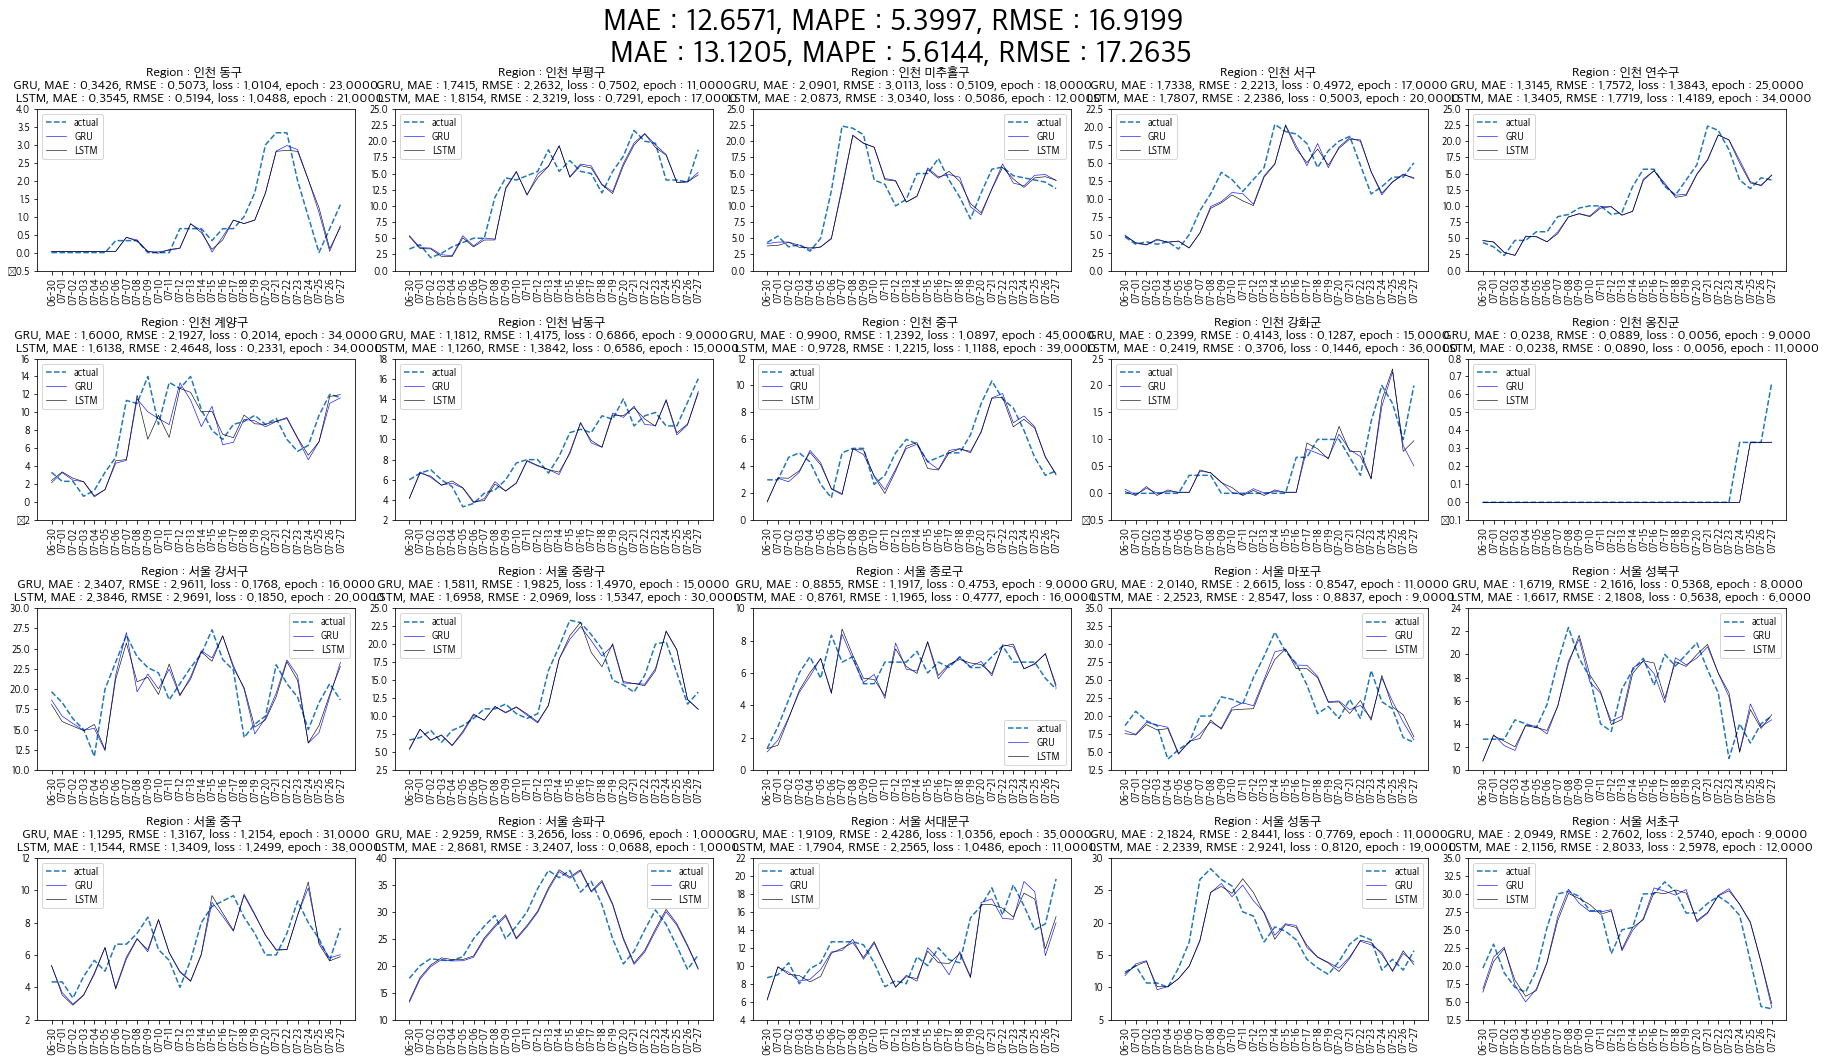

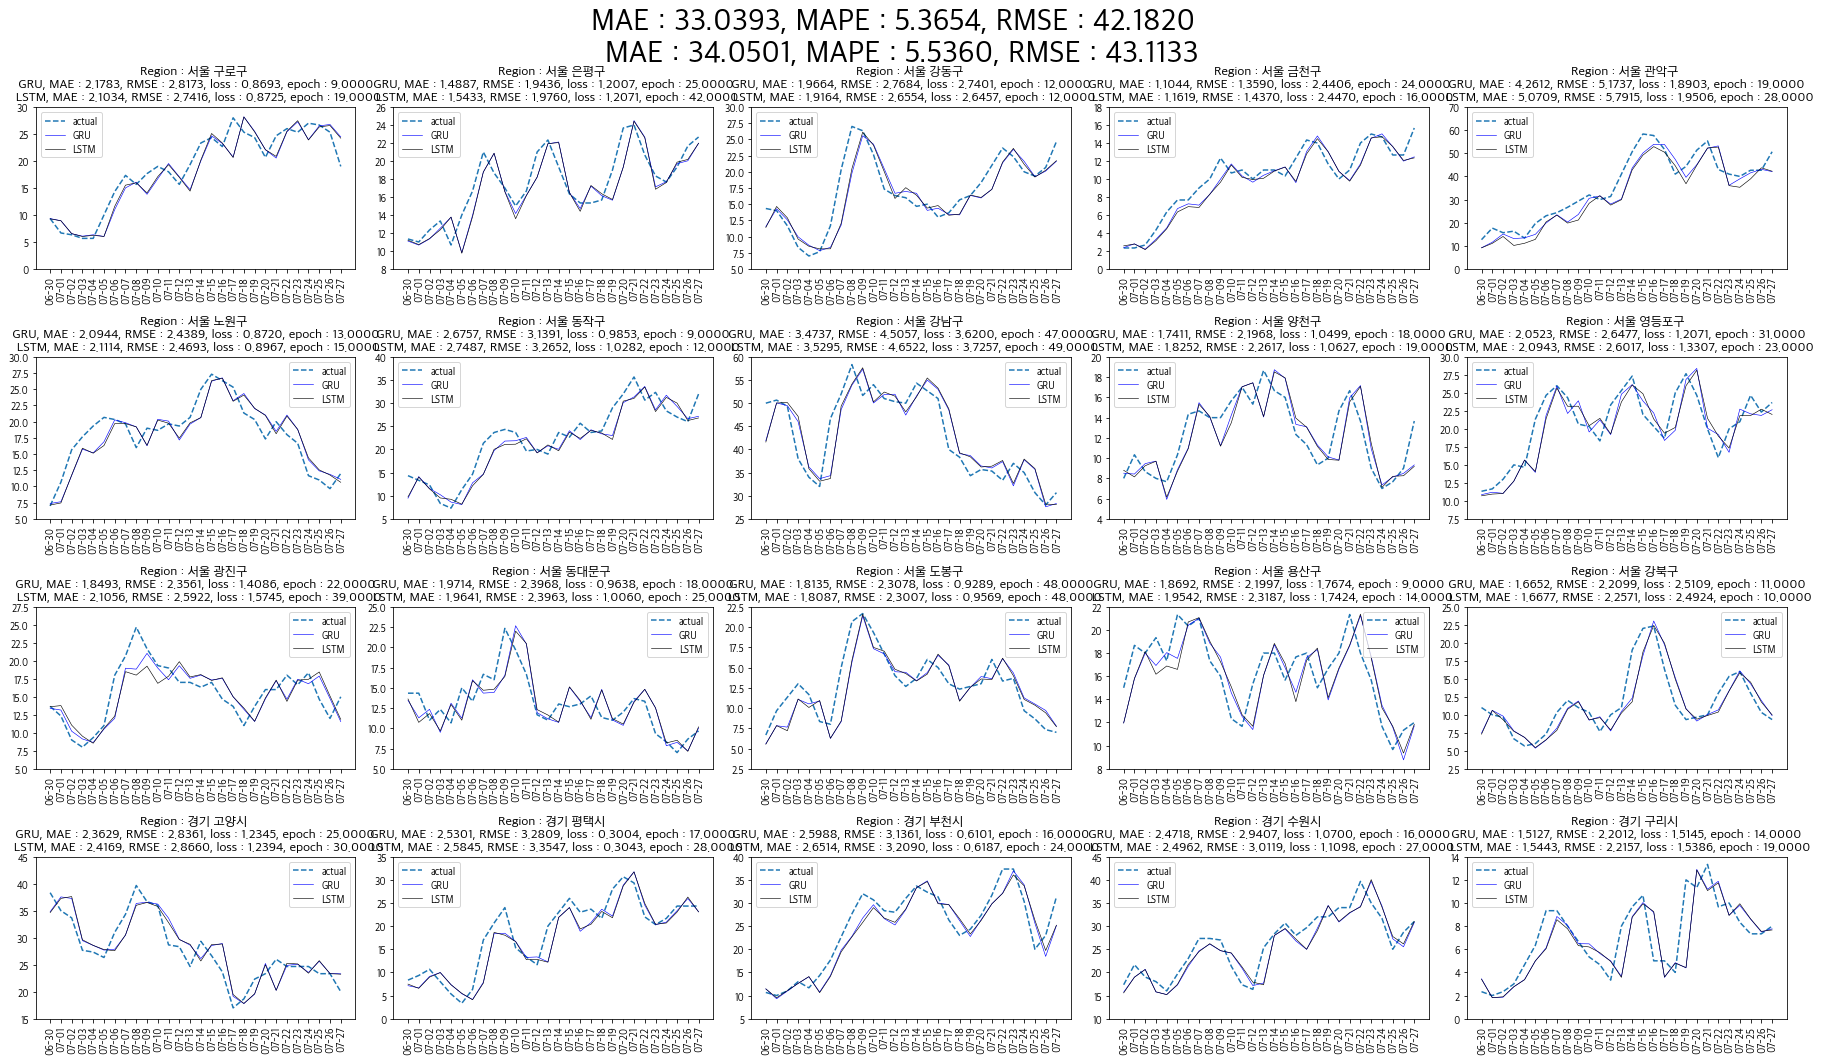

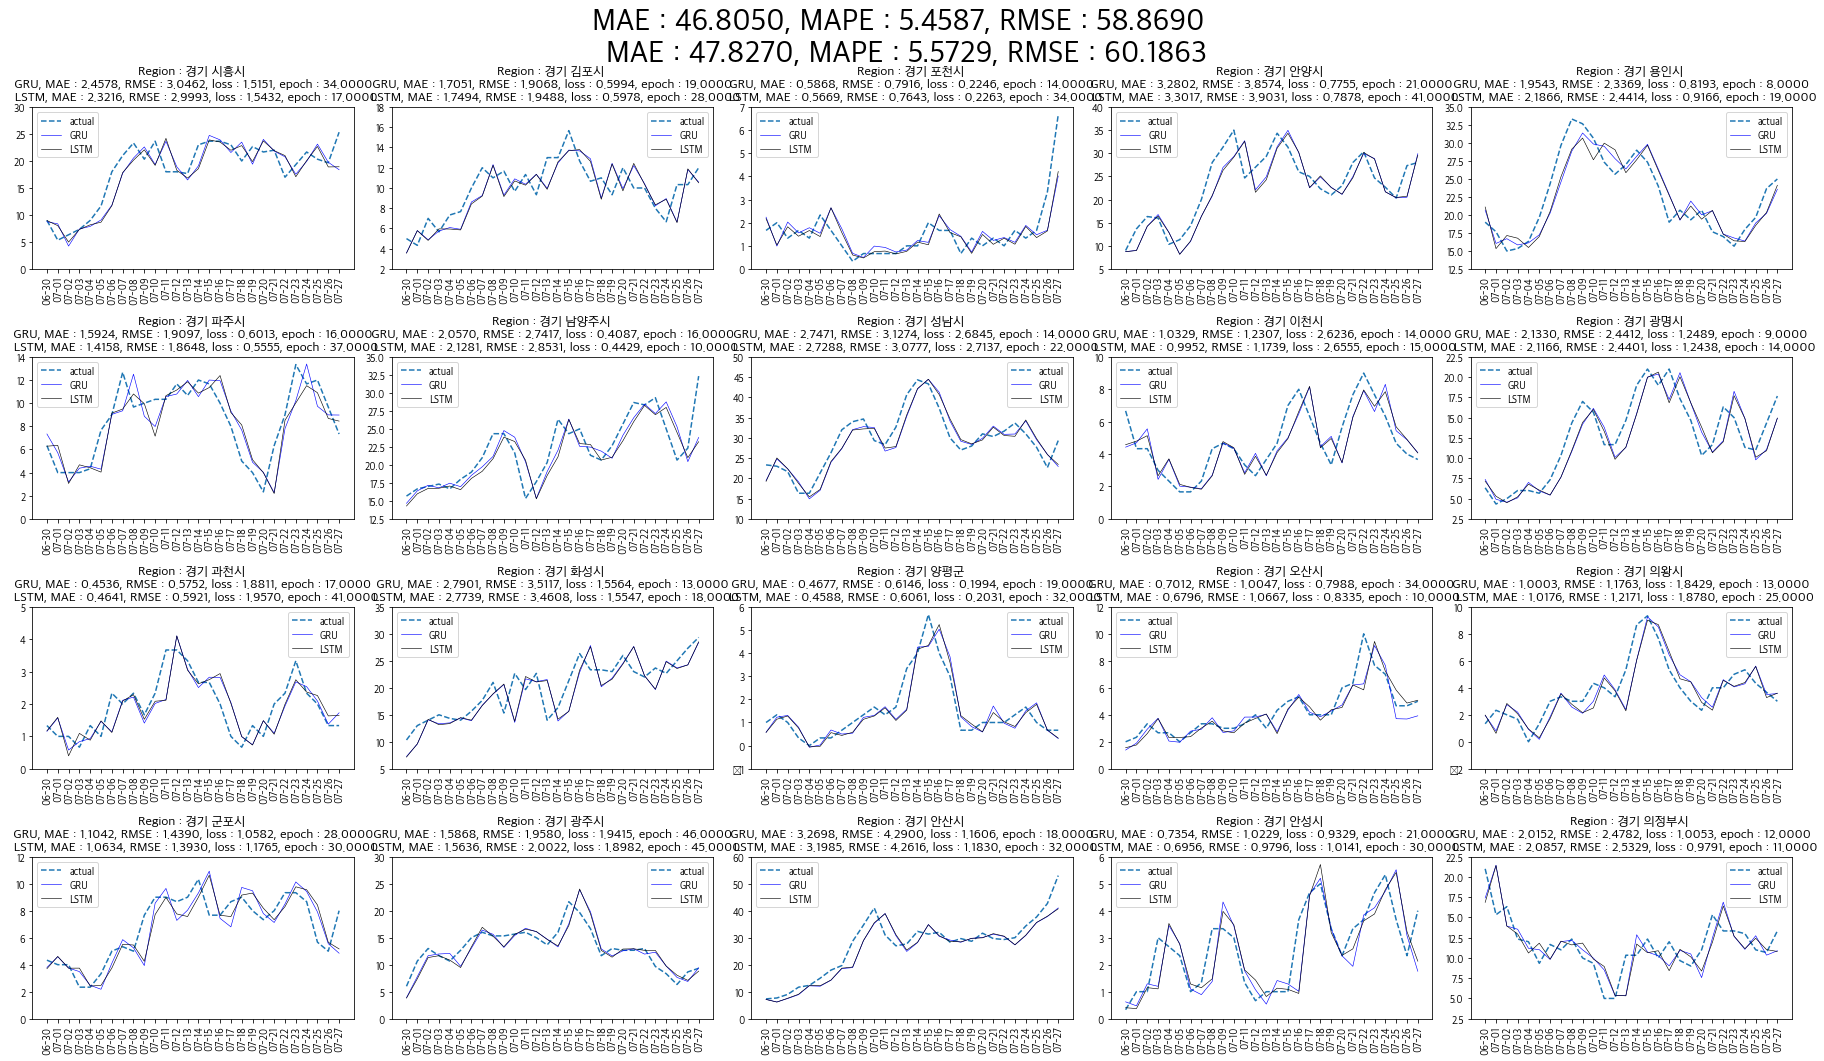

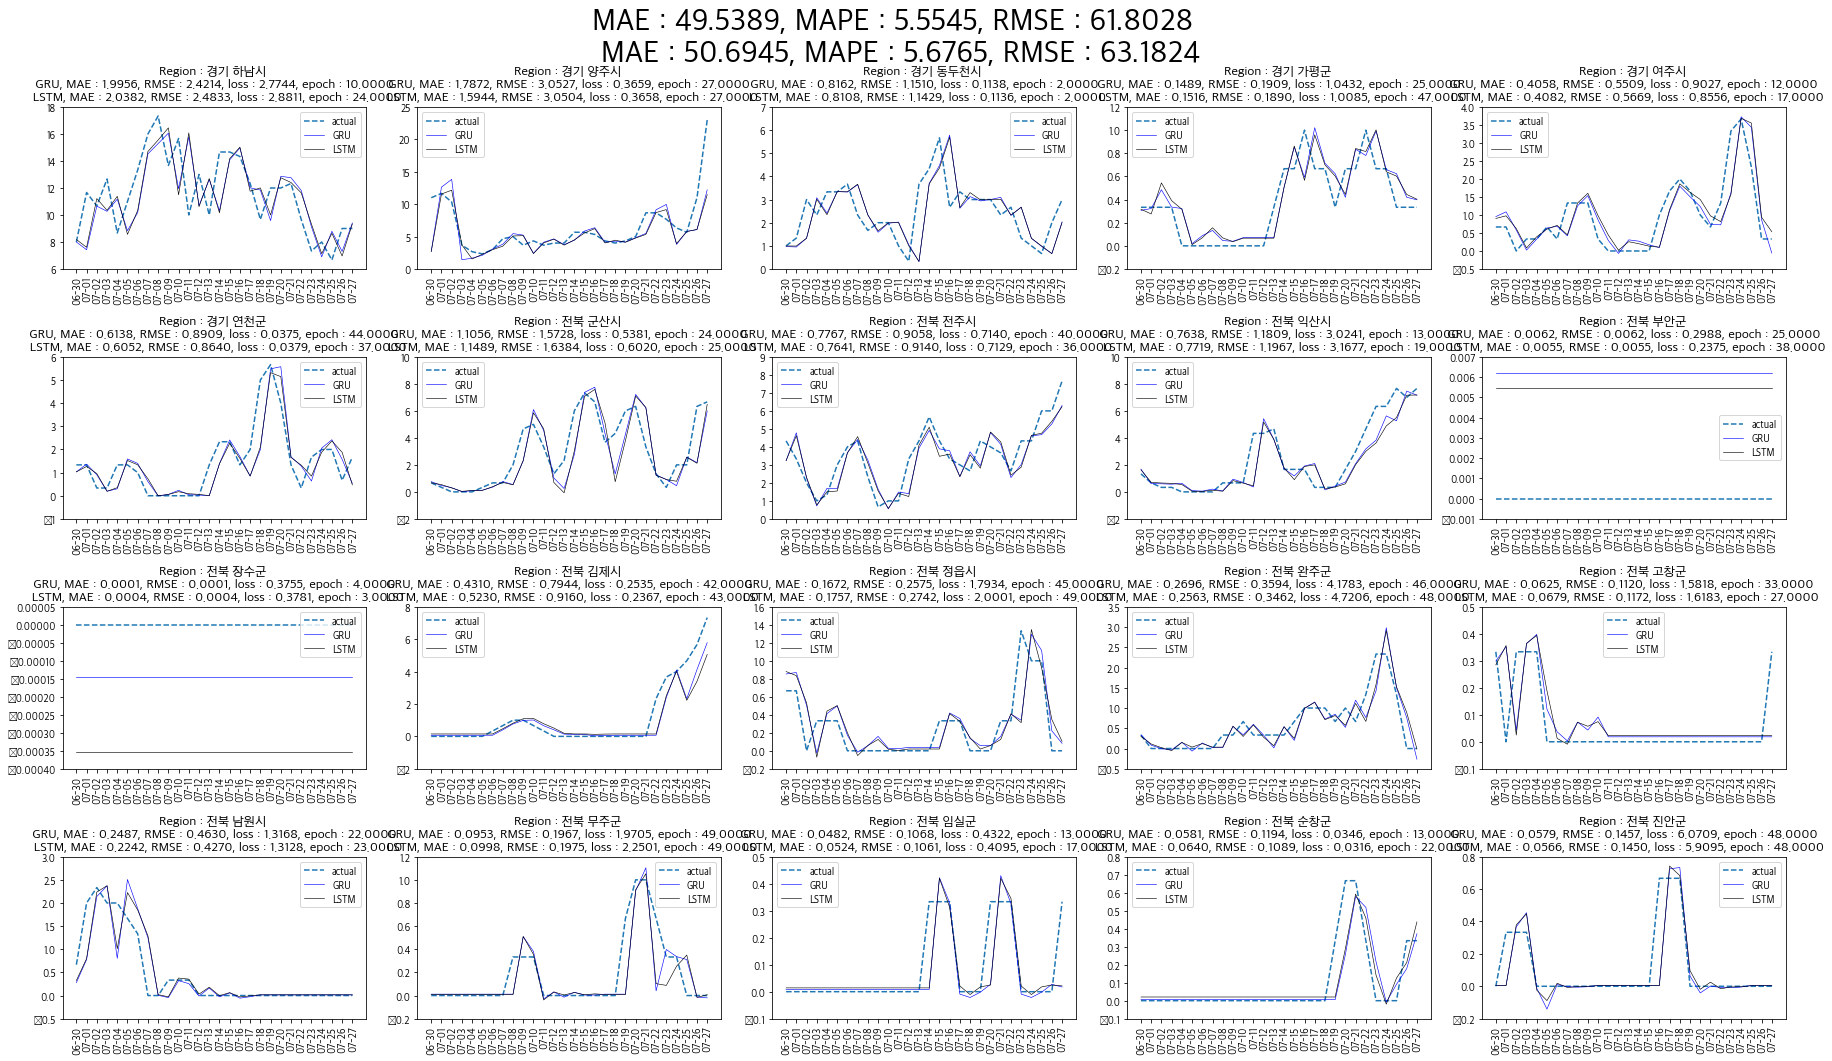

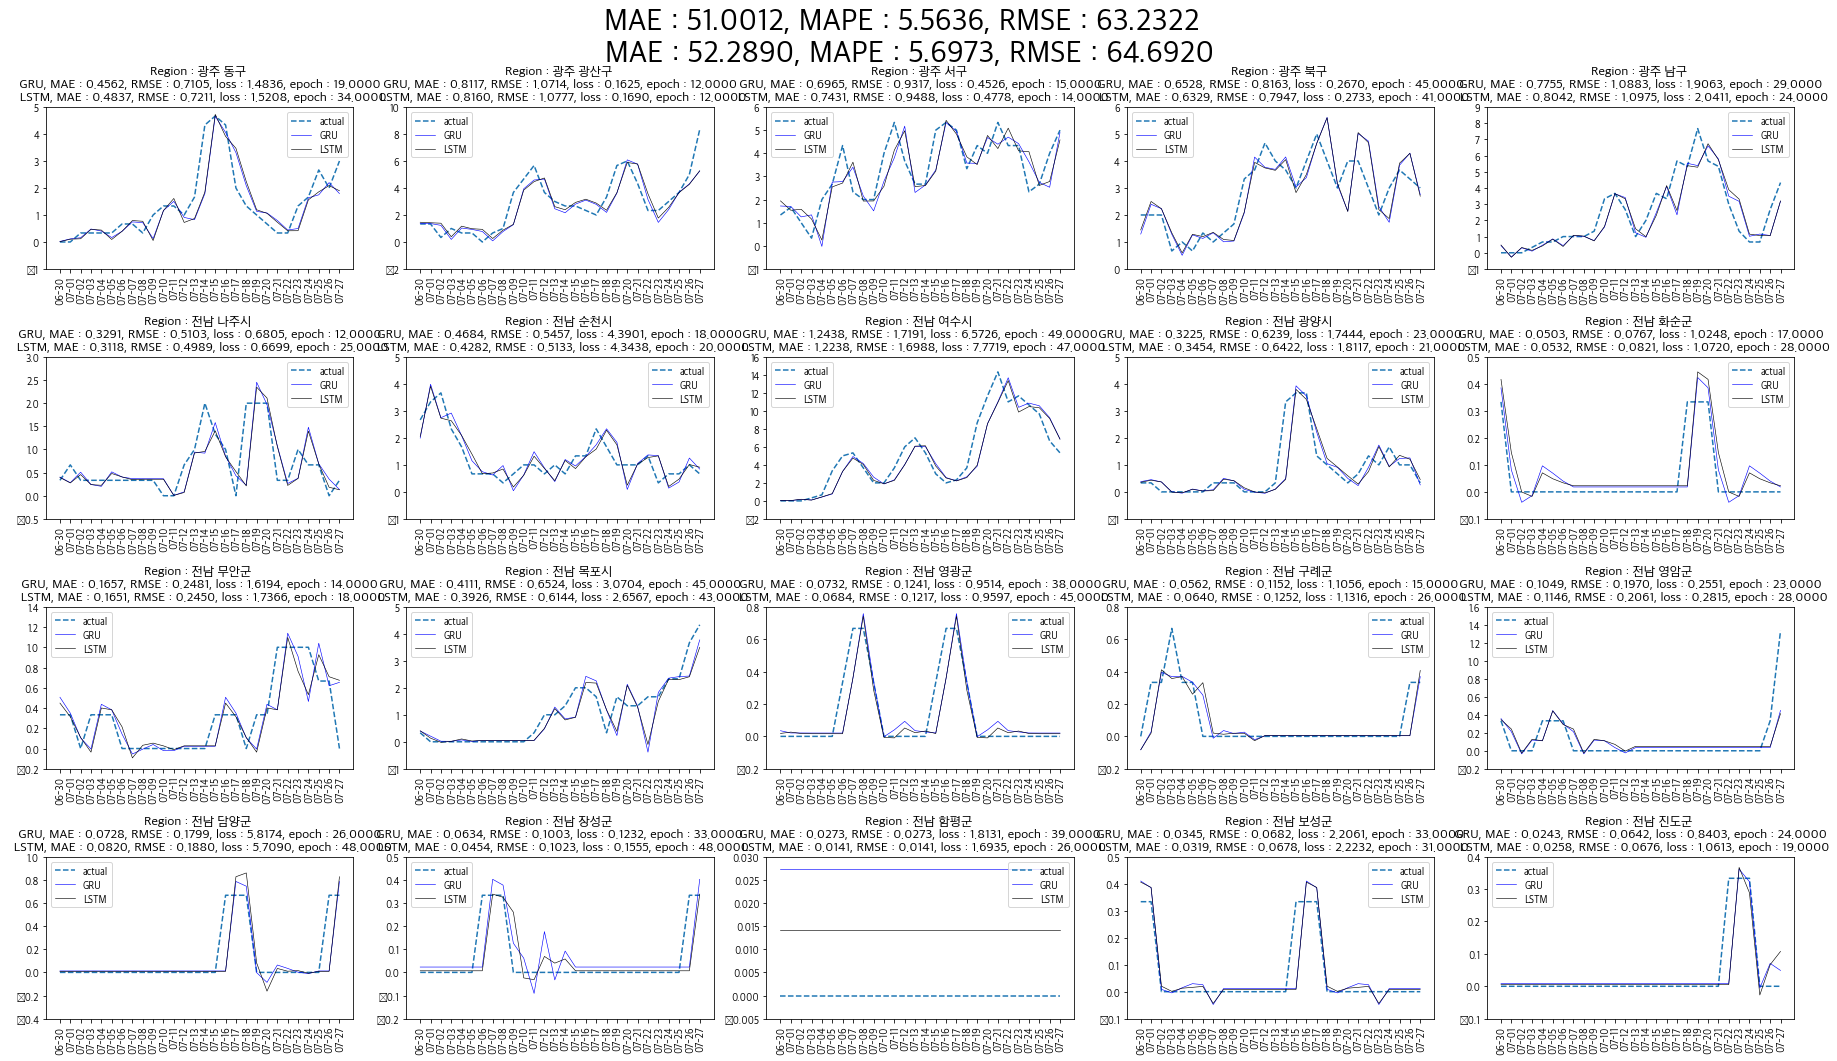

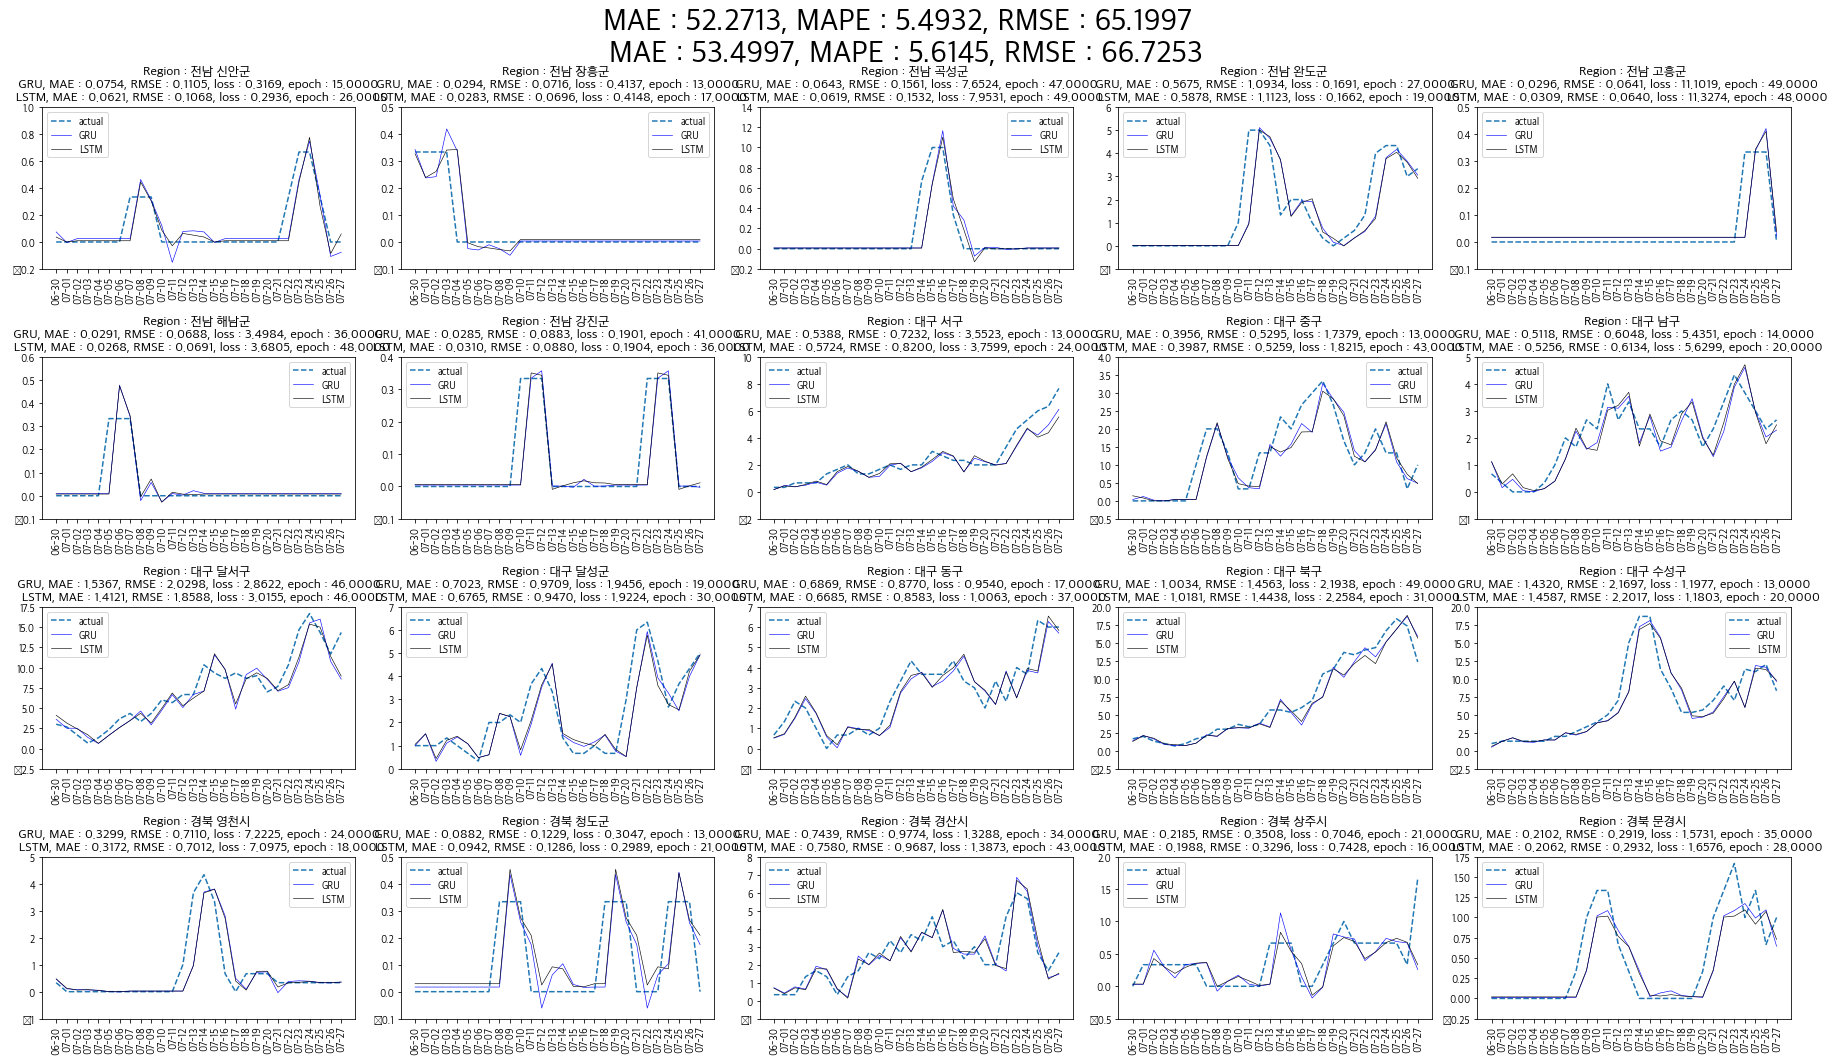

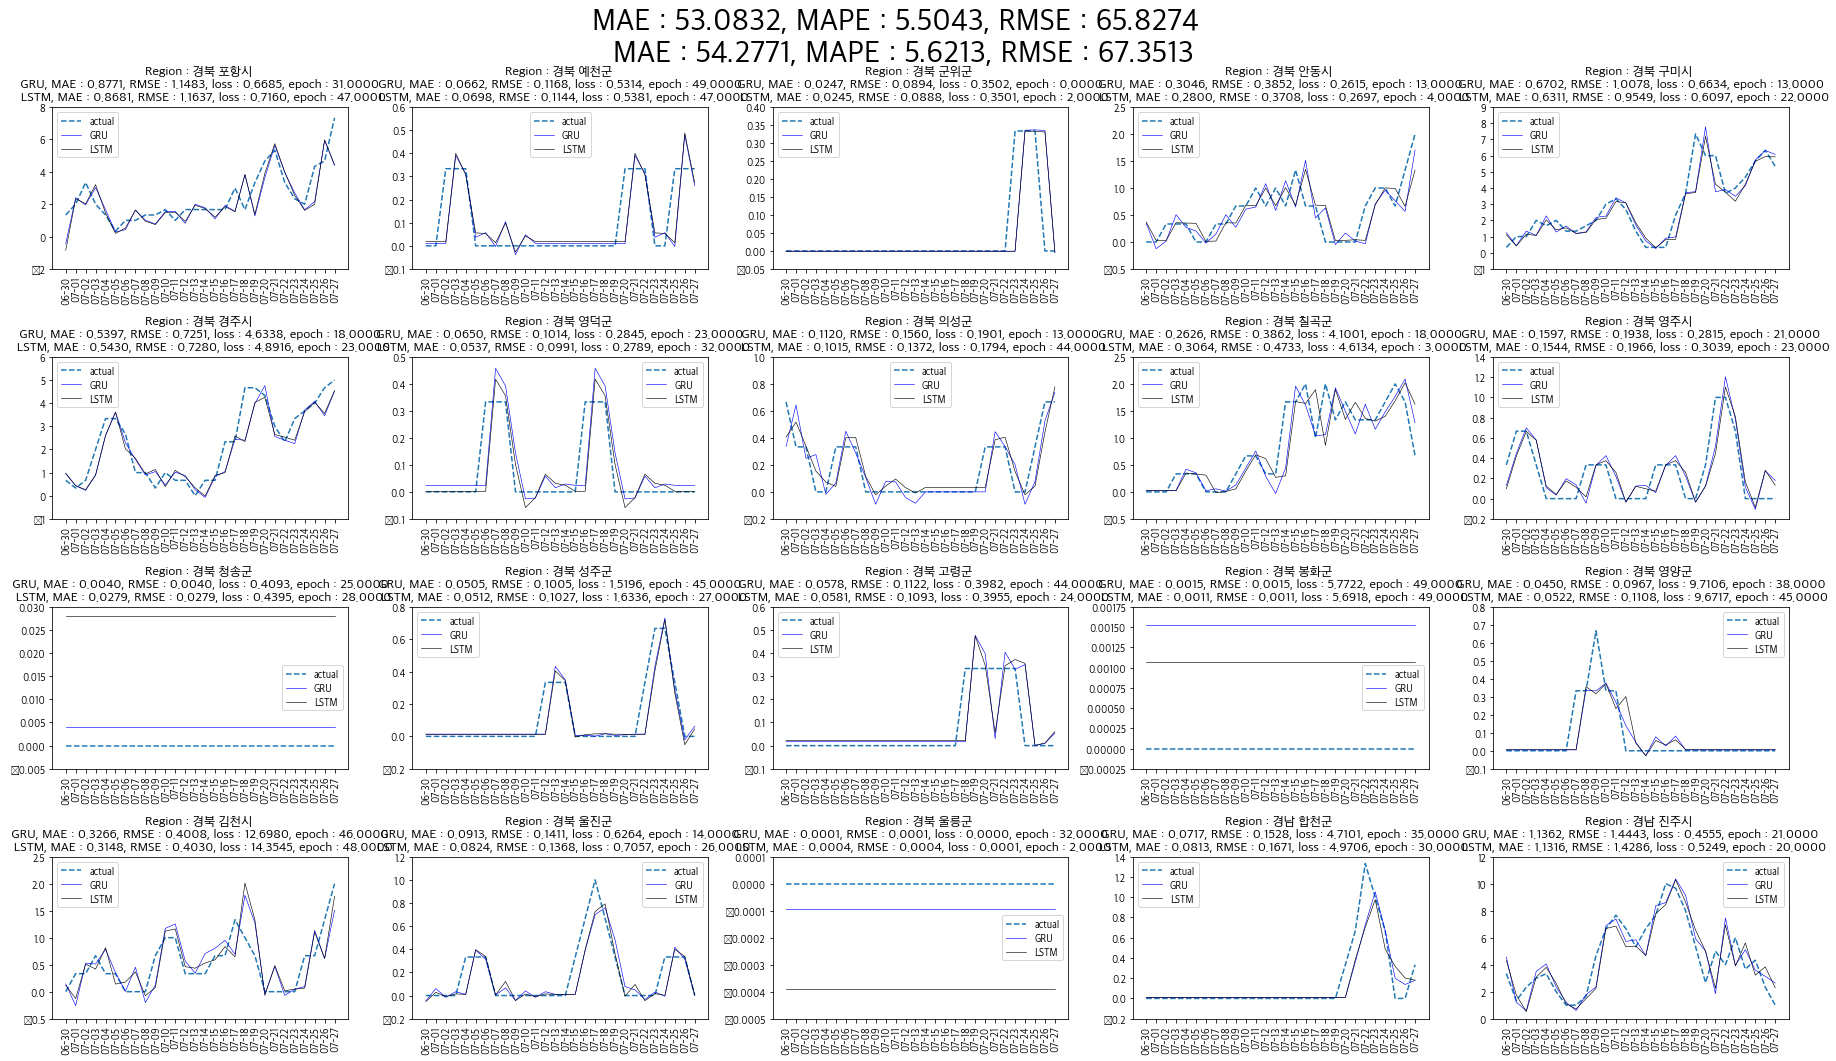

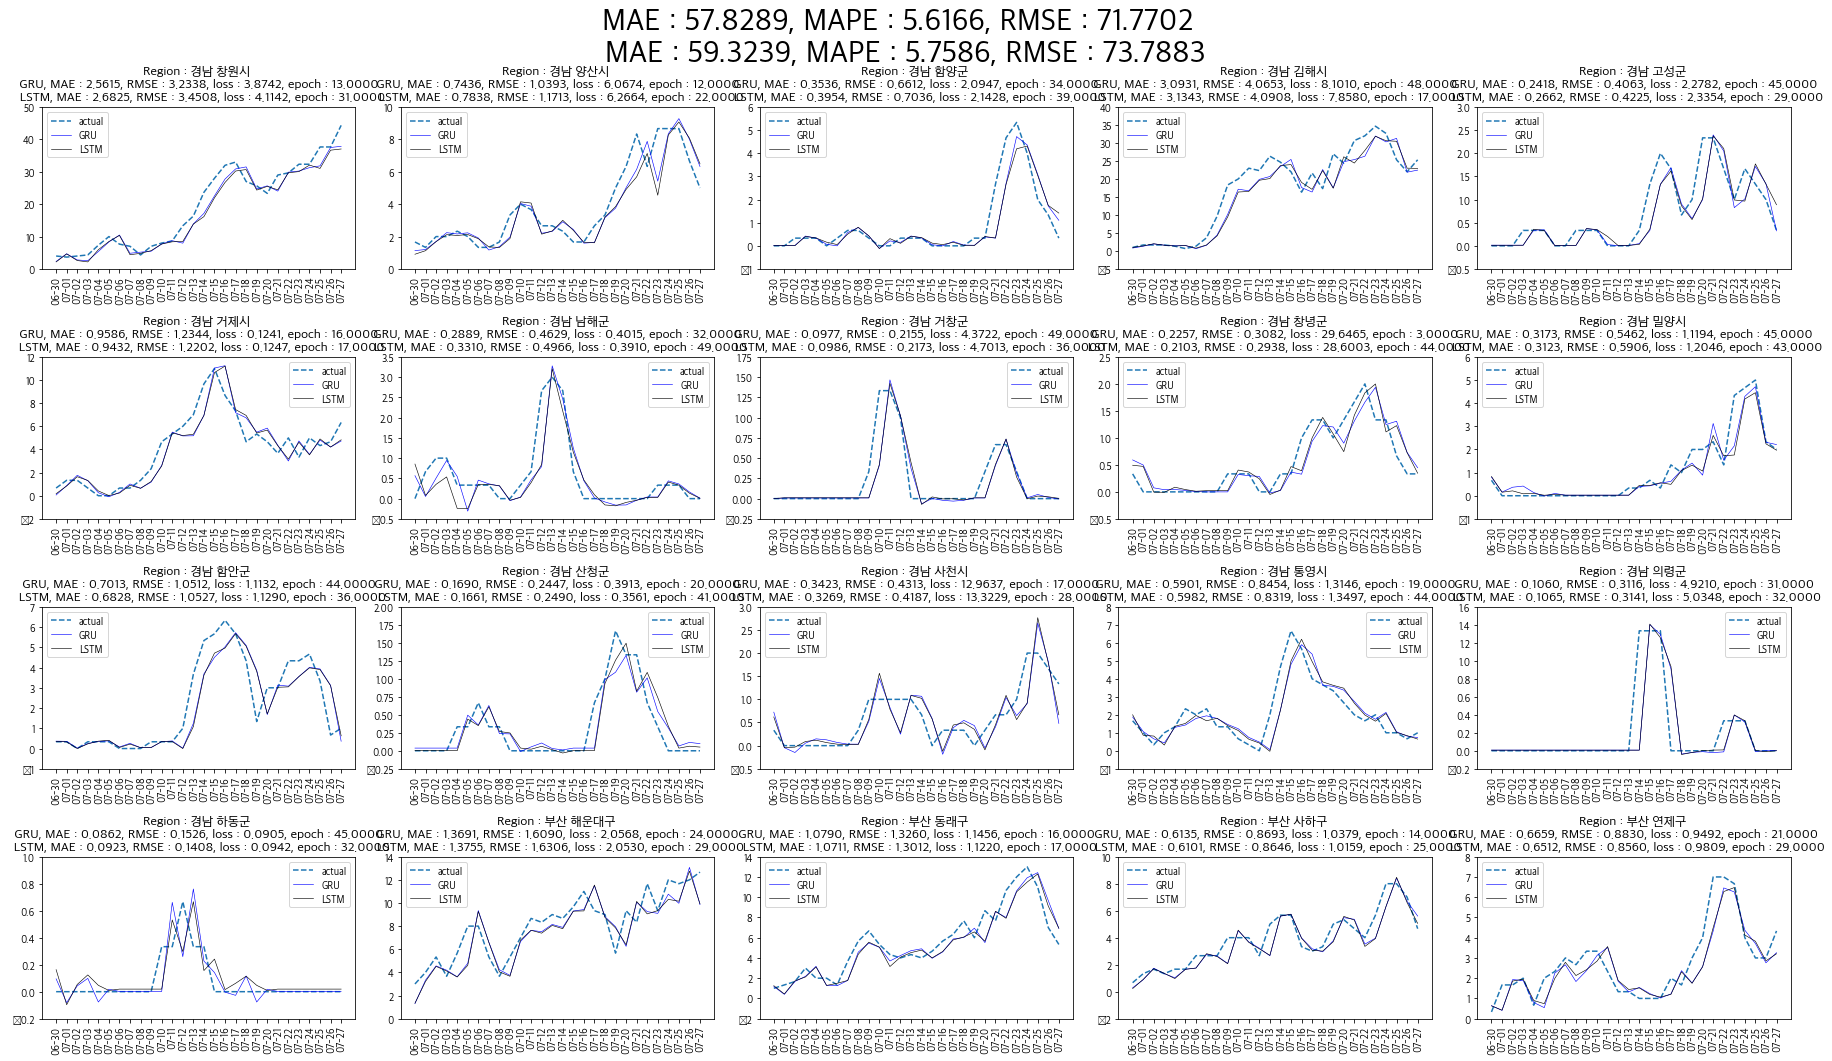

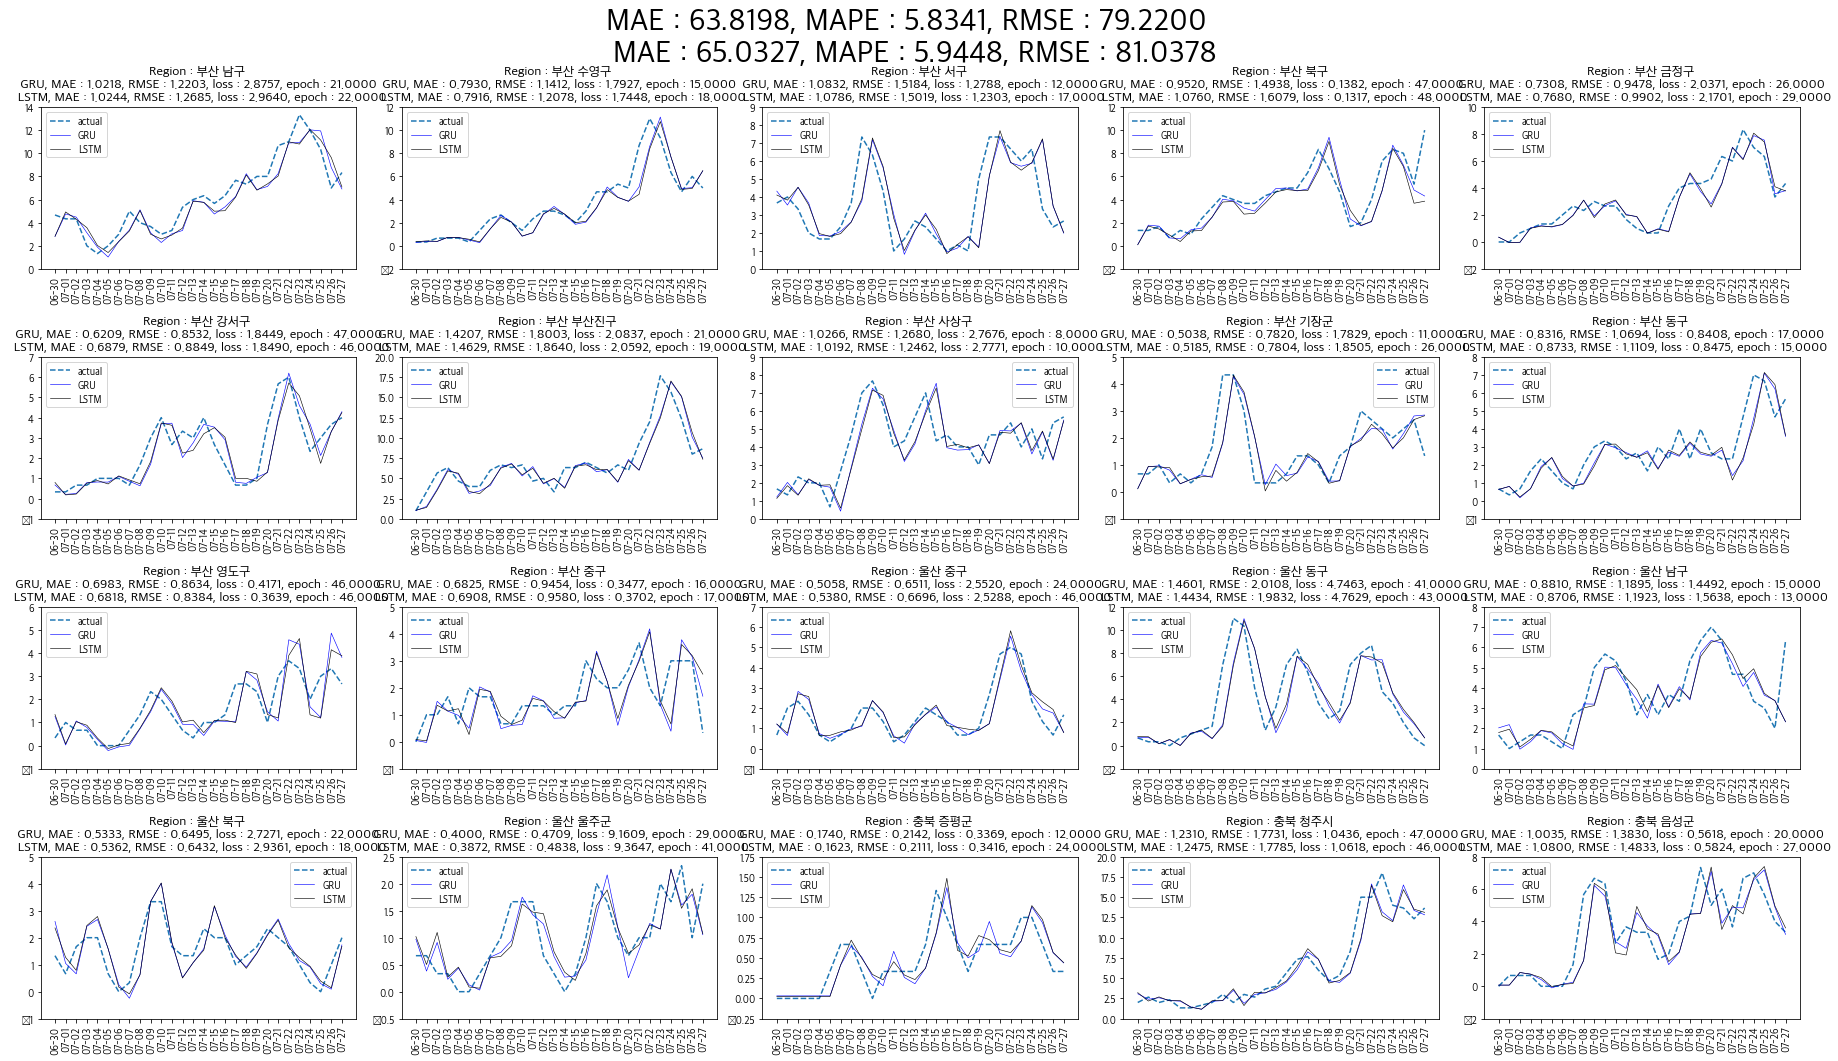

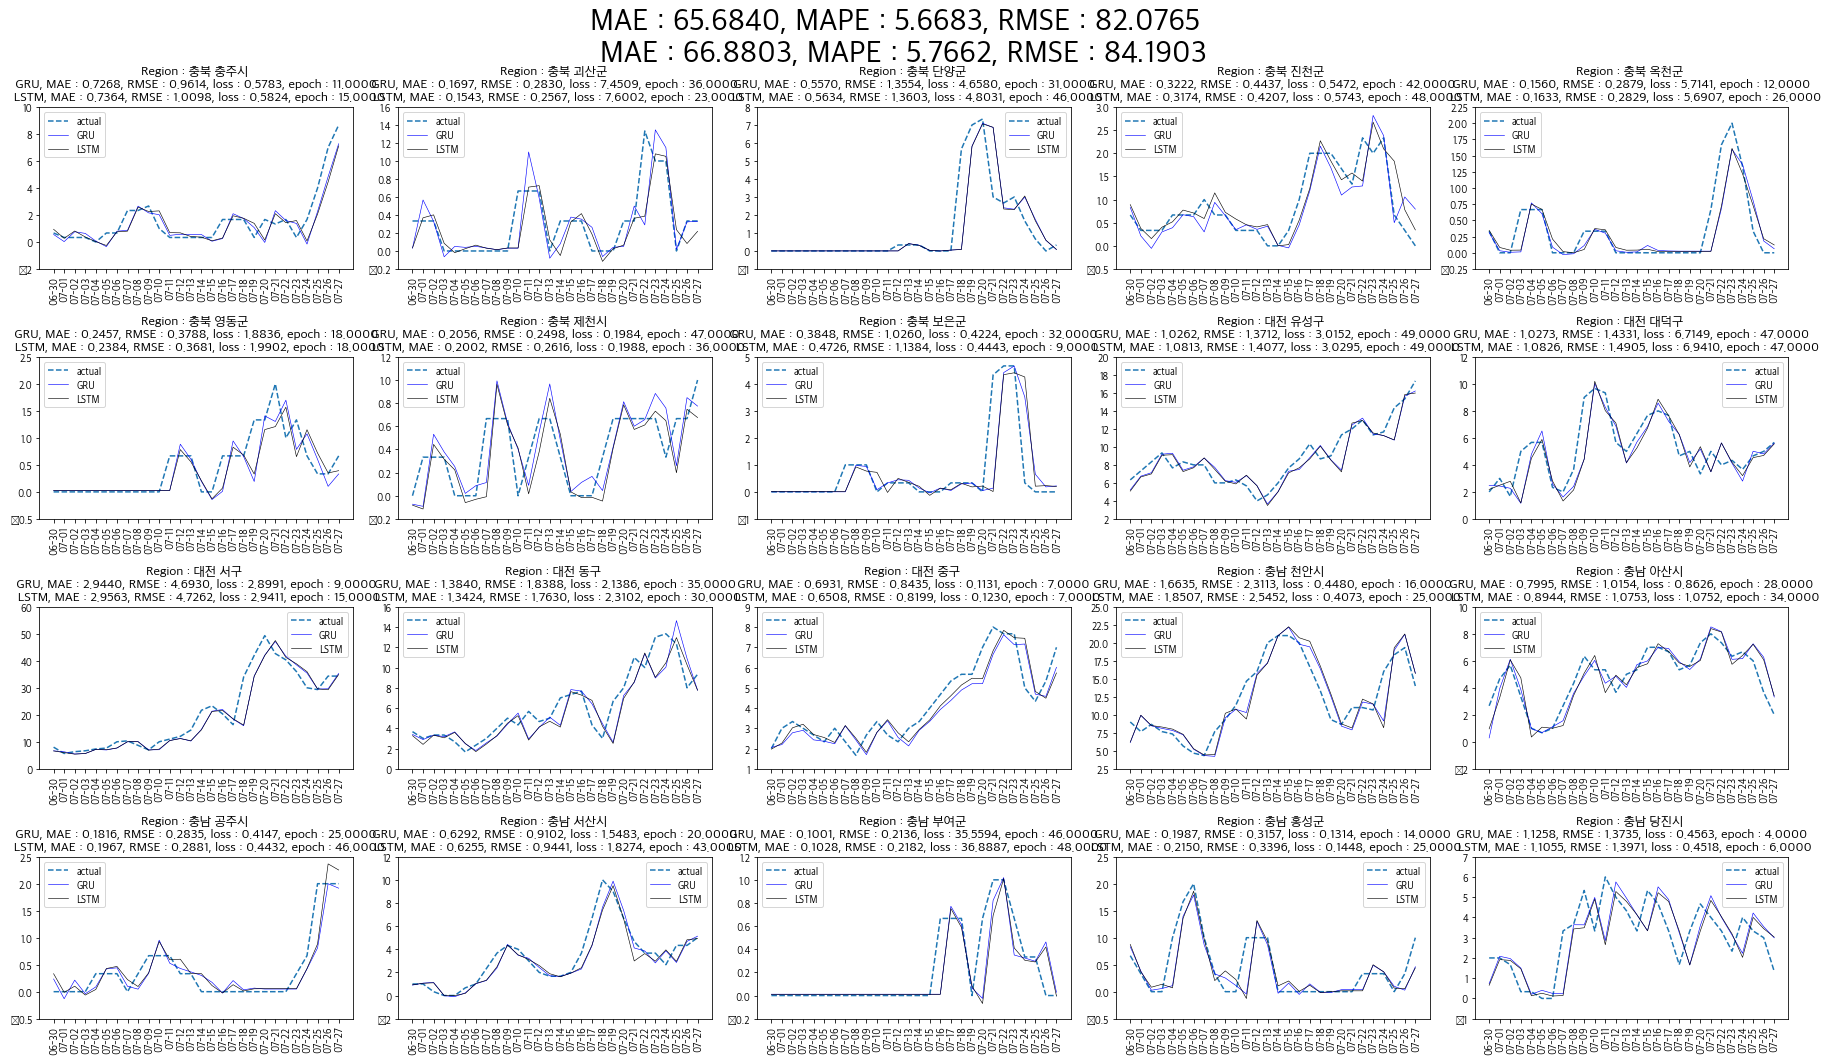

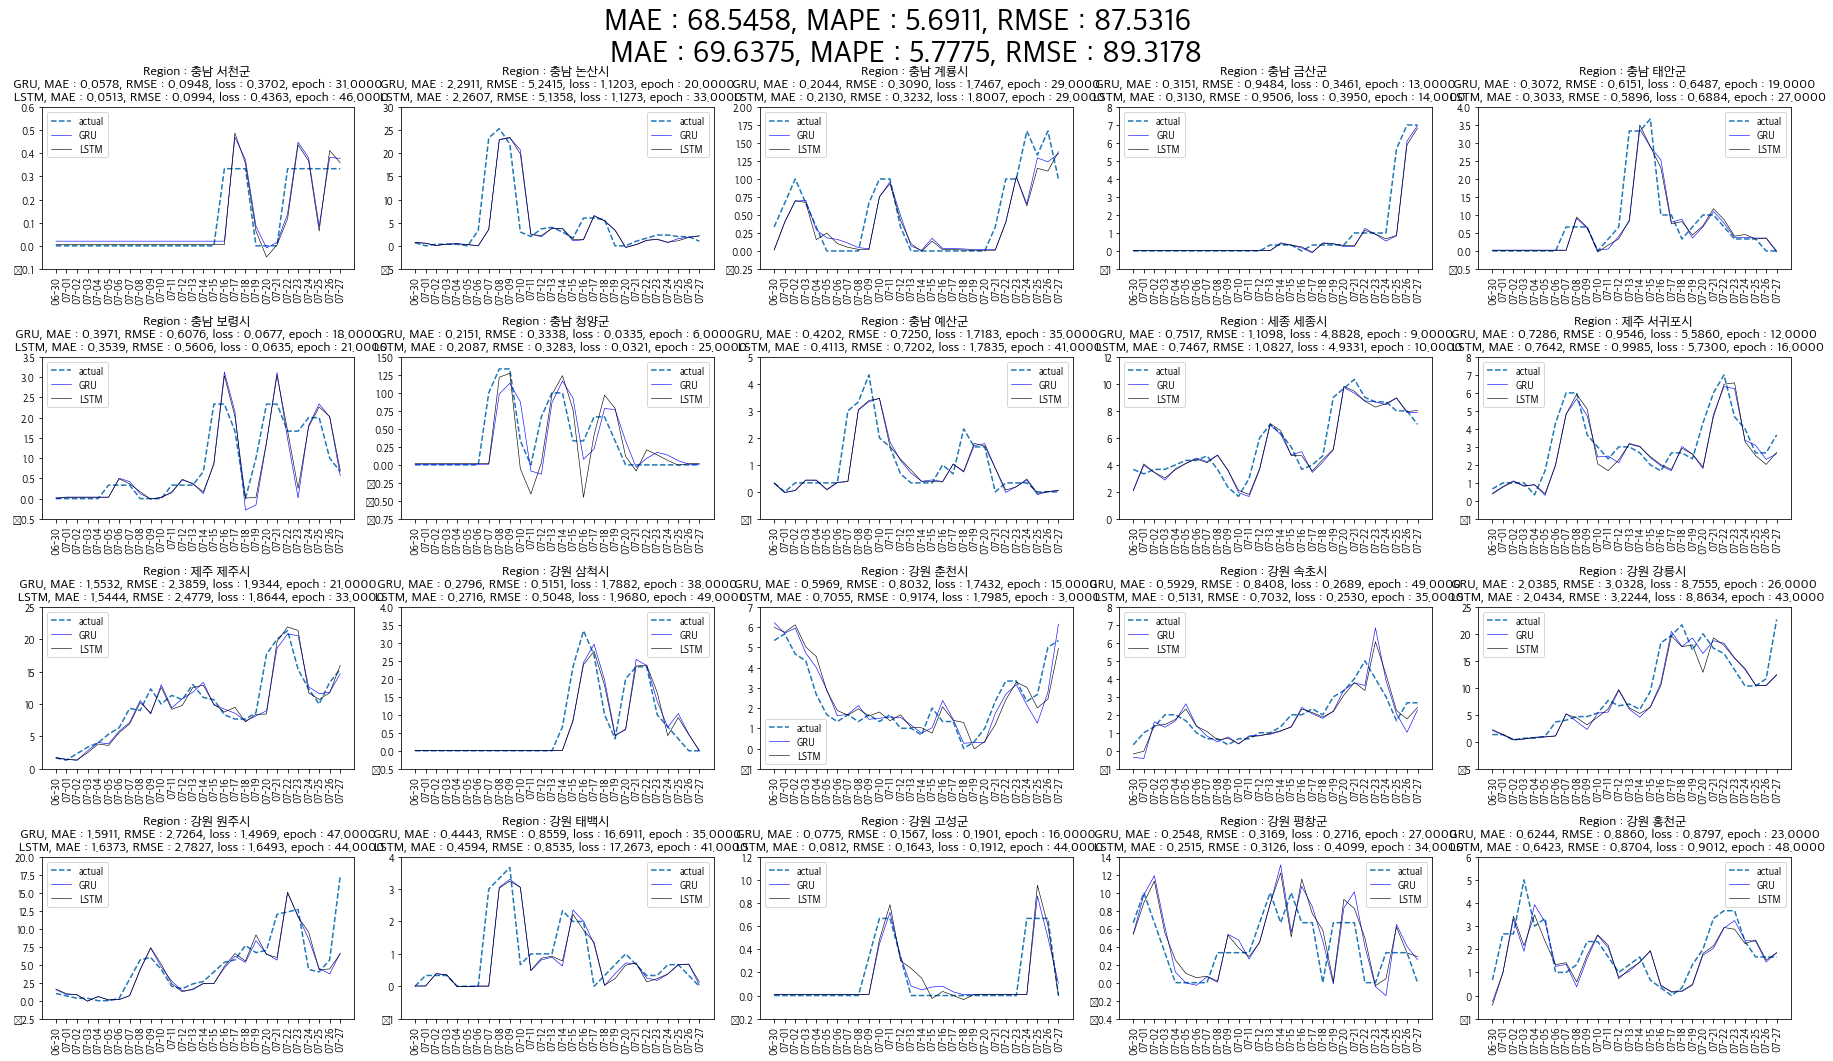

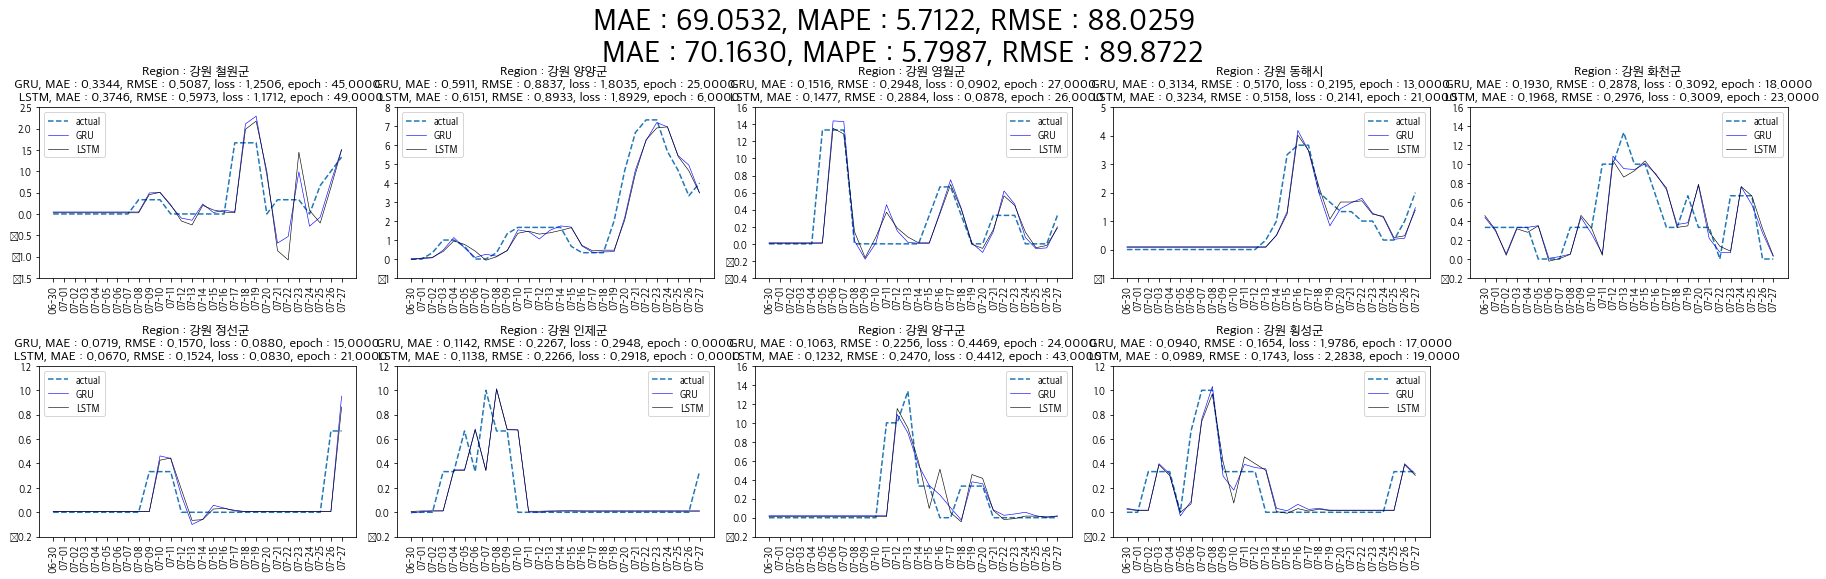

In [9]:
##################
## Load Dataset ##
##################

region_type = 'city'
df2 = pd.read_csv(f'/Users/jeonjunhwi/문서/Projects/Master_GNN/Data/KCDC_data/Processing_Results/smoothing_3_{region_type}_mean.csv', index_col=0, encoding='cp949')

df = df2.iloc[100:554] # 델타 : 554, 540, 533 오미크론 : 707, 693, 686 
df2 = df2.iloc[100:554] 

df = df.diff()
df = df.iloc[1:, :]

# split_date = '2021-11-25'
split_date = '2021-06-25'
val_ratio = 0.2

train_df = df[df.index < split_date]
test = df.iloc[len(train_df):, :]

len_val = int(train_df.shape[0] * val_ratio)
len_train = train_df.shape[0] - len_val
train = train_df.iloc[:len_train,:]
val = train_df.iloc[len_train :, :]


### 컬럼을 숫자로 바꿔줌 ###
# region_dict = {}
# for i, region in enumerate(df.columns):
#     region_dict[i] = region
# df.columns = list(region_dict.keys())

############################################
## train, test, validation length setting ##
############################################

save_GRU = pd.DataFrame({})
save_LSTM = pd.DataFrame({})
fig = plt.figure(figsize=(25,15), facecolor='white')
true_df2 = []
pred_1_list = []
pred_2_list = []

############################
## Hyperparameter Setting ##
############################

suptitle_1 = 'Standard Scaler, GRU'
suptitle_2 = 'Standard Scaler, LSTM'
epochs = 50
batch_size = 16
num_layers = 2
hidden_size = 32
output_size = 32
sequence_length = 5
learning_rate = 1e-3
criterion = nn.MSELoss()

MAE_GRU_list, RMSE_GRU_list, MAE_LSTM_list, RMSE_LSTM_list = [], [], [], []
# date_split = f"{df.index[0]} ~ {df.index[len_train]} ~ {df.index[len_train + len_val]} ~ {df.index[-1]}"
# print(date_split)
# for i in [0]:
for i, region in enumerate(df.columns):
    
    #######################
    ## Define DataLoader ##
    #######################
    
    train = df[[region]][:len_train]
    val = df[[region]][ len_train: len_train + len_val]
    test = df[[region]][ len_train + len_val:]
    
    scaler = StandardScaler()

    train = scaler.fit_transform(train)
    val = scaler.transform(val)
    test = scaler.transform(test)

    x_train_seq, y_train_seq = seq_data(train, sequence_length)
    x_val_seq, y_val_seq = seq_data(val, sequence_length)
    x_test_seq, y_test_seq = seq_data(test, sequence_length)
    print(x_train_seq.shape, x_val_seq.shape, x_test_seq.shape)
    
    date_split = f"{df.index[0]} ~ {df.index[len(x_train_seq)-1]} ~ {df.index[len(x_train_seq)+sequence_length + len(x_val_seq)+sequence_length*2-1]} ~ {df.index[-1]}"
    print(date_split)
    
    # input(" stop ")
    n_test_samples = len(y_test_seq)
    train_torch = torch.utils.data.TensorDataset(x_train_seq, y_train_seq)
    val_torch = torch.utils.data.TensorDataset(x_val_seq, y_val_seq)
    test_torch = torch.utils.data.TensorDataset(x_test_seq, y_test_seq)
    
    train_loader = torch.utils.data.DataLoader(dataset=train_torch, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(dataset=val_torch, batch_size=batch_size, shuffle=False)
    test_loader = torch.utils.data.DataLoader(dataset=test_torch, batch_size=batch_size, shuffle=False)

    save_path_1 = f"save_model/gru_smooth_3_{suptitle_1}_{i}.pt"
    save_path_2 = f"save_model/lstm_smooth_3_{suptitle_2}_{i}.pt"
    
    ############################
    ## Define Model and Train ##
    ############################
    
    model_1 = GRU(input_size = x_train_seq.size(2), # x_train_seq.size() : [train_days, time_steps, channel]
                    hidden_size = hidden_size,
                    sequence_length = sequence_length,
                    num_layers = num_layers,
                    device = device).to(device)
    
    model_2 = LSTM(input_size = x_train_seq.size(2),
                    hidden_size = hidden_size,
                    sequence_length = sequence_length,
                    num_layers = num_layers,
                    device = device).to(device)
    
    optimizer_1 = optim.Adam(model_1.parameters(), lr=learning_rate)
    optimizer_2 = optim.Adam(model_2.parameters(), lr=learning_rate)
    
    trainer_1 = RNNTrainer(model=model_1,
                        train_loader=train_loader,
                        val_loader=val_loader,
                        # test_loader=test_loader,
                        test_loader=torch.tensor(x_test_seq, dtype=torch.float32), # x_test
                        loss=criterion,
                        optimizer=optimizer_1,
                        scaler=scaler,
                        device=device,
                        save_path=save_path_1,
                        raw_test=df2.iloc[-(n_test_samples + 1):,i].values)

    trainer_2 = RNNTrainer(model=model_2,
                        train_loader=train_loader,
                        val_loader=val_loader,
                        # test_loader=test_loader,
                        test_loader=torch.tensor(x_test_seq, dtype=torch.float32), # x_test
                        loss=criterion,
                        optimizer=optimizer_2,
                        scaler=scaler,
                        device=device,
                        save_path=save_path_2,
                        raw_test=df2.iloc[-(n_test_samples + 1):,i].values)
    
    val_loss_1, epoch_1 = trainer_1.train(epochs)
    val_loss_2, epoch_2 = trainer_2.train(epochs)
    pred_1 = trainer_1.predict()
    pred_2 = trainer_2.predict()

    #######################
    ## Calculate Metrics ##
    #######################
    
    true_df2 += df2.iloc[-n_test_samples:,i].tolist()
    pred_1_list += list(pred_1)
    pred_2_list += list(pred_2)
    
    # df2를 다 머지하고, pred_1도 다 머지하고
    
    RMSE_GRU, RMSE_total_GRU = compute_metrics(df2.iloc[-n_test_samples:,i], pred_1, metric='rmse')
    MAE_GRU, MAE_total_GRU = compute_metrics(df2.iloc[-n_test_samples:,i], pred_1, metric='mae')
    MAPE_GRU, MAPE_total_GRU = compute_metrics(df2.iloc[-n_test_samples:,i], pred_1, metric='mape')
    
    RMSE_LSTM, RMSE_total_LSTM = compute_metrics(df2.iloc[-n_test_samples:,i], pred_2, metric='rmse')
    MAE_LSTM, MAE_total_LSTM = compute_metrics(df2.iloc[-n_test_samples:,i], pred_2, metric='mae')
    MAPE_LSTM, MAPE_total_LSTM = compute_metrics(df2.iloc[-n_test_samples:,i], pred_2, metric='mape')
    
    ##########################
    ## Original Data Figure ##
    ##########################

    save_GRU[region] = pred_1
    save_LSTM[region] = pred_2
    
    from math import ceil
    if i == 20 * ceil(i/20):
        fig = plt.figure(figsize=(25,15), facecolor='white')
        print(i)
    
    # 20개 이상인 지역들을 다른 figure에 plot 하기 위해 범위를 나눠줌
    # if i == 0: # city
    # if i == 1: # state
        # range_ = range(20)
    # elif 20*(i+1) > len(df.columns): # 마지막이 20의 배수보다 작으면
        # range_ = range(20*i, len(df.columns))
    # else:
        # range_ = range(20*i, 20*(i+1))
    # print(y_pred.shape[1])
    # for j in range_: # 17 도시에 대해서 각 도, 66개 수도권 시군구에 대해서 시군구
    if i<20:
        ax1 = fig.add_subplot(4,5,i+1)
    elif i<40:
        ax1 = fig.add_subplot(4,5,i-19)
    elif i<60:
        ax1 = fig.add_subplot(4,5,i-39)
    elif i<80:
        ax1 = fig.add_subplot(4,5,i-59)
    elif i<100:
        ax1 = fig.add_subplot(4,5,i-79)
    elif i<120:
        ax1 = fig.add_subplot(4,5,i-99)
    elif i<140:
        ax1 = fig.add_subplot(4,5,i-119)
    elif i<160:
        ax1 = fig.add_subplot(4,5,i-139)
    elif i<180:
        ax1 = fig.add_subplot(4,5,i-159)
    elif i<200:
        ax1 = fig.add_subplot(4,5,i-179)
    elif i<220:
        ax1 = fig.add_subplot(4,5,i-199)
    elif i<240:
        ax1 = fig.add_subplot(4,5,i-219)
        
    
    
    ax1.plot(df2.iloc[-n_test_samples:,i].values,'--')
    ax1.plot(pred_1,'b',linewidth=0.6)
    ax1.plot(pred_2,'k',linewidth=0.6)
    ax1.legend(['actual', 'GRU', 'LSTM'])
    
    # 5: -> yyyy-mm-dd -> mm-dd
    xlabels = [i[5:] for i in list(df2.index[-n_test_samples:])]
    ax1.set_xticks(ticks = [i for i in range(len(xlabels))], labels = xlabels, rotation=90)
    yticks_ = ax1.get_yticks()
    ax1.set_yticks(yticks_, fontsize = 15)
    
    # title_ = f"{region} \n MAE: {MAE_GRU.item():.4f},RMSE: {RMSE_GRU.item():.4f}, gru_loss: {val_loss_1:.4f}, gru_epoch : {epoch_1} \n MAE: {MAE_LSTM.item():.4f},RMSE: {RMSE_LSTM.item():.4f}, gru_loss: {val_loss_1:.4f}, gru_epoch : {epoch_1}"
    title_ = 'Region : {} \n GRU, MAE : {:.4f}, RMSE : {:.4f}, loss : {:.4f}, epoch : {:.4f} \n  LSTM, MAE : {:.4f}, RMSE : {:.4f}, loss : {:.4f}, epoch : {:.4f}'
    title_ = title_.format(region,
                        MAE_GRU.item(),RMSE_GRU.item(),val_loss_1,epoch_1,
                        MAE_LSTM.item(),RMSE_LSTM.item(),val_loss_2,epoch_2
                        )
    ax1.set_title(title_ ,fontsize = 13)
    
    MAE_GRU_list.append(MAE_GRU.item())
    RMSE_GRU_list.append(RMSE_GRU.item())
    
    MAE_LSTM_list.append(MAE_LSTM.item())
    RMSE_LSTM_list.append(RMSE_LSTM.item())
    
    
    #################
    ## Save Figure ##
    #################

    # 20개 하고 fig 저장하고 하는 방식이라서 이건 figure에 mae 못넣네. 이건 total mae를 따로 저장해야하네 
    
    # suptitle = f"MAE : {MAE_avg_GRU:.4f}, MAPE : {MAPE_avg_GRU:.4f}, RMSE : {RMSE_avg_GRU:.4f} \n MAE : {MAE_avg_LSTM:.4f}, MAPE : {MAPE_avg_LSTM:.4f}, RMSE : {RMSE_avg_LSTM:.4f}"
    # fig.suptitle(suptitle, fontsize=30)
    fig.tight_layout()
    fig.savefig(f'Result/Figures/compare_rnn_original_{region_type}_{ceil(i/20)}.png')

true_df2 = np.array(true_df2).reshape(-1,)
pred_1_list = np.array(pred_1_list).reshape(-1,)
pred_2_list = np.array(pred_2_list).reshape(-1,)

_, RMSE_avg_GRU = compute_metrics(true_df2, pred_1_list, metric='rmse')
_, MAE_avg_GRU = compute_metrics(true_df2, pred_1_list, metric='mae')
_, MAPE_avg_GRU = compute_metrics(true_df2, pred_1_list, metric='mape')

_, RMSE_avg_LSTM = compute_metrics(true_df2, pred_2_list, metric='rmse')
_, MAE_avg_LSTM = compute_metrics(true_df2, pred_2_list, metric='mae')
_, MAPE_avg_LSTM = compute_metrics(true_df2, pred_2_list, metric='mape')

#####################
## Save Prediction ##
#####################

# Save for Total Metric of Each Metric
pd.DataFrame({'MAE_GRU' : MAE_GRU_list,
              'RMSE_GRU' : RMSE_GRU_list,
              'MAE_LSTM' : MAE_LSTM_list,
              'RMSE_LSTM' : MAE_LSTM_list
              }, index=df.columns).to_csv(f'Result/summary/RNN_region_metric.csv', encoding='cp949')

pd.DataFrame({'MAE_total' : [MAE_avg_GRU, MAE_avg_LSTM],
              'MAPE_total' : [MAPE_avg_GRU, MAPE_avg_LSTM],
              'RMSE_total' : [RMSE_avg_GRU, RMSE_avg_LSTM],
              }, index=['GRU', 'LSTM']).to_csv(f'Result/summary/RNN_total_metric.csv', encoding='cp949')

save_GRU['신고일'] = df2.index[-n_test_samples:]
save_GRU.set_index('신고일', inplace=True)
save_GRU.to_csv(f'Result/pred/pred_GRU_{region_type}.csv', encoding='cp949')
save_LSTM['신고일'] = df2.index[-n_test_samples:]
save_LSTM.set_index('신고일', inplace=True)
save_LSTM.to_csv(f'Result/pred/pred_LSTM_{region_type}.csv', encoding='cp949')

In [12]:
MAE_total_GRU, RMSE_total_GRU

(0.0939606848904597, 0.1654233154425481)

In [14]:
len(df2.iloc[-n_test_samples:,i]), len(pred_1)

(28, 28)

In [15]:
len(true_df2), len(pred_1_list)

(28, 28)

In [16]:
pred_1_list

array([ 654.0804539 ,  730.24079402,  754.90540048,  715.86230176,
        707.08496721,  692.3927152 ,  794.50787531,  973.34865662,
       1149.04635363, 1224.23514381, 1265.07765599, 1233.47825146,
       1153.42574437, 1187.93461794, 1356.2378715 , 1514.79166147,
       1500.77485044, 1409.95573682, 1375.07522389, 1312.52423852,
       1391.33979947, 1500.69648316, 1606.55288269, 1548.57347857,
       1524.55557046, 1475.80468168, 1380.07553036, 1404.91677542])

In [18]:
true_df2

array([ 736.        ,  768.33333333,  767.        ,  731.66666667,
        690.66666667,  777.33333333,  937.        , 1166.66666667,
       1284.33333333, 1341.66666667, 1286.66666667, 1190.33333333,
       1190.        , 1325.        , 1497.        , 1550.        ,
       1496.33333333, 1416.33333333, 1321.        , 1384.66666667,
       1483.33333333, 1623.        , 1604.66666667, 1605.        ,
       1497.66666667, 1413.66666667, 1395.33333333, 1572.33333333])